# **Datasets**

## Detection problem



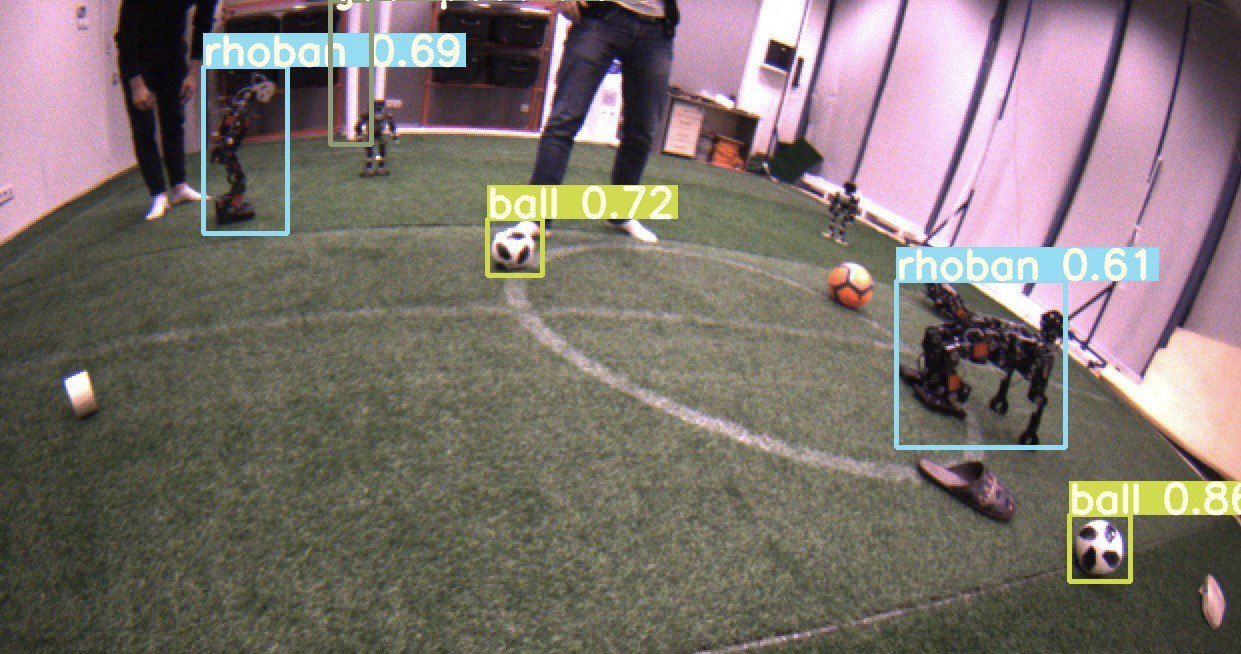

## Segmentation problem

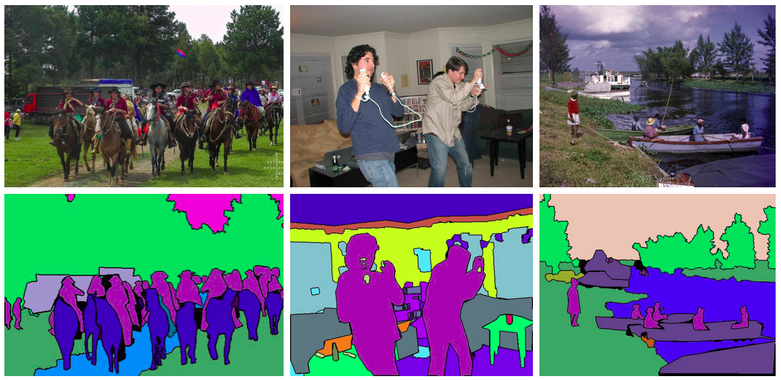

https://cocodataset.org/#panoptic-2020

## Keypoint Detection Task

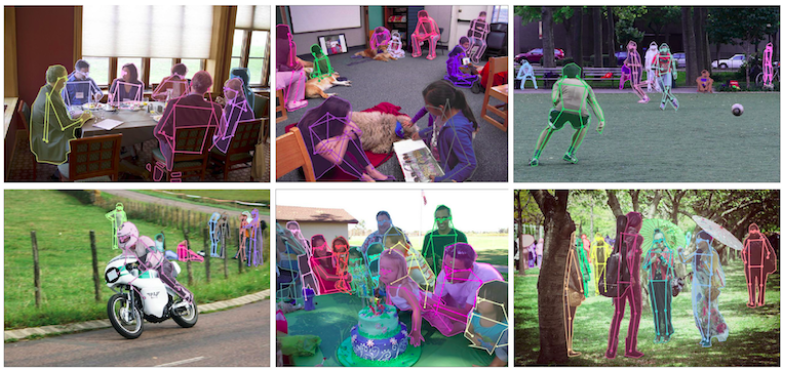

https://cocodataset.org/#keypoints-2020

# **PyTorch Datasets**


## Basic methods

In [ ]:
from torch.utils.data import Dataset

class NumbersDataset(Dataset):
  def __init__(self, low, high):
      self.samples = list(range(low, high))

  def __len__(self):
      return len(self.samples)

  def __getitem__(self, idx):
      return self.samples[idx]


In [ ]:
dataset = NumbersDataset(100, 400)
print(len(dataset))

In [ ]:
print(dataset[10])

## DataLoader

In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=40, shuffle=True)
for i, batch in enumerate(dataloader):
  print(i, batch, len(batch))

## Custom Dataset

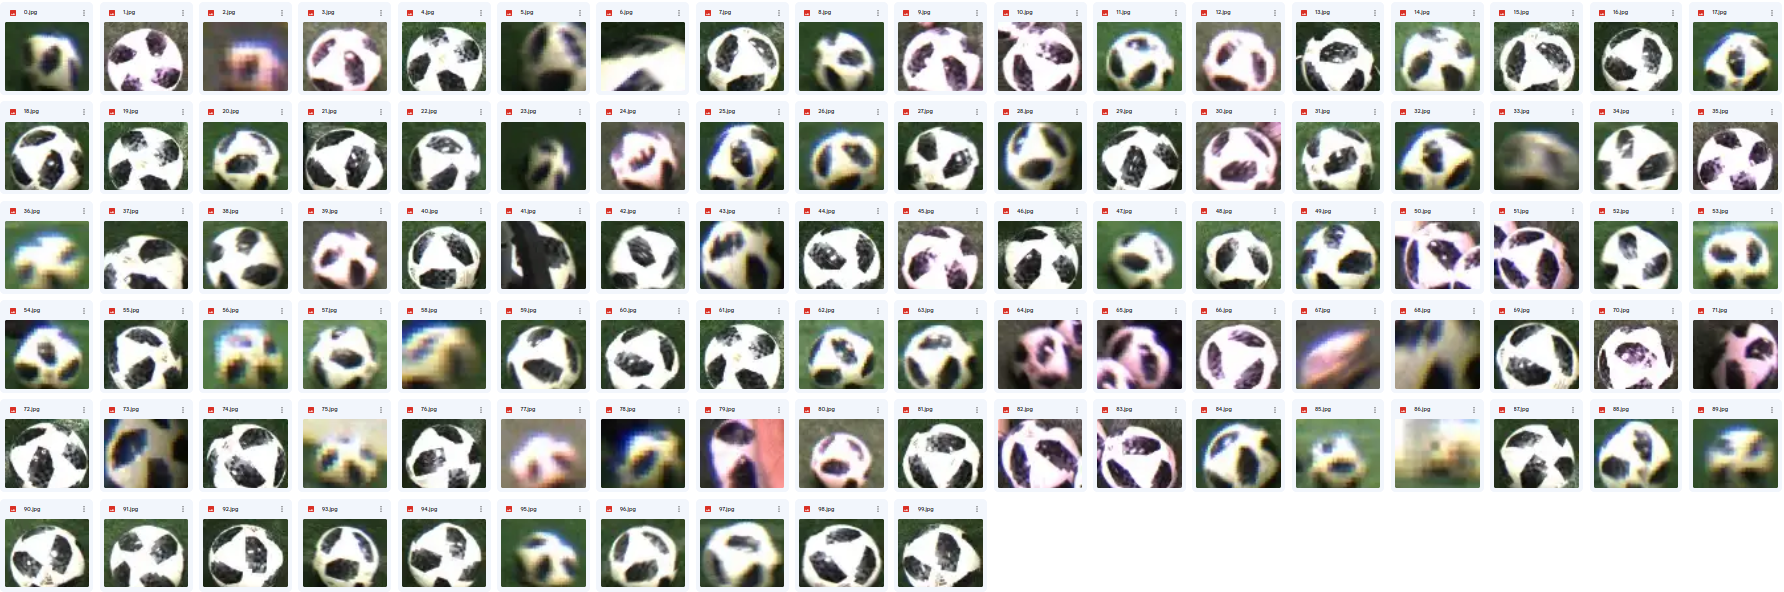

In [ ]:
# get access to images
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

path_to_data = "drive/MyDrive/Colab Notebooks/data"
dt = cv2.imread(os.path.join(path_to_data, "12.jpg"))
dt = cv2.cvtColor(dt, cv2.COLOR_RGB2BGR)
plt.axis("off")
plt.imshow(dt)

In [ ]:
from torch.utils.data import Dataset


class ImgDataset(Dataset):
  def __init__(self, path = "data", transform = None):
      self.path = path
      self.samples = [el for el in os.listdir(self.path) \
                      if el.endswith(".jpg")]
      print(self.samples)
      if transform is None:
        self.should_transform = False
      else:
        self.transform = transform
        self.should_transform = True

  def __len__(self):
      return len(self.samples)

  def __getitem__(self, idx):
      img_path = os.path.join(self.path, self.samples[idx])
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      if self.should_transform:
        img = self.transform(img)

      return {"image": img, "type": "ball"}

In [ ]:
dataset = ImgDataset(path_to_data)
plt.axis("off")
plt.imshow(dataset[3]["image"])

# **Data augmentation**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms, utils


scale_factor = 0.5
img_size = (64, 64)

scaled_size = (int(img_size[0]*scale_factor), int(img_size[1]*scale_factor))
crop_size = (int(32 * 0.8), int(32 * 0.8))


data_transform_list = [
        transforms.ToPILImage(),
        transforms.Resize(scaled_size),
        transforms.CenterCrop(crop_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]

In [ ]:
img = dt

In [ ]:
pil_img = data_transform_list[0](img)

tens_img = data_transform_list[3](pil_img)
im = data_transform_list[4](tens_img)
plt.imshow(im)

In [ ]:
transform = transforms.Compose(data_transform_list)
plt.imshow(transform(img).permute(1,2,0).numpy())

In [ ]:
data = ImgDataset(path = path_to_data, transform = transform)
plt.imshow(data[4]["image"].permute(2,1,0).numpy())

In [ ]:
plt.imshow(pil_img)

In [ ]:
rot = transforms.RandomRotation((-10, 10))
img = rot(pil_img)
plt.imshow(img)

In [ ]:
from torchvision import transforms


data_augentation_list = [
      transforms.RandomRotation((-20, 20)),
      transforms.RandomCrop((int(32 * 0.8), int(32 * 0.8))),
      transforms.RandomHorizontalFlip(),
    ]

In [ ]:
img = data_augentation_list[2](pil_img)
plt.imshow(data_augentation_list[2](pil_img))

In [ ]:
img = transforms.ColorJitter(brightness=(0.8, 1.2))(pil_img)
plt.imshow(img)

In [ ]:
transform = transforms.Compose(data_augentation_list)

In [ ]:
plt.imshow(transform(pil_img))

# **Splitting**

In [ ]:
import torch
train_set, val_set, test_set = torch.utils.data.random_split(data, [80, 10, 10])
print(len(train_set), len(val_set), len(test_set))

# **Examples**

## COCO

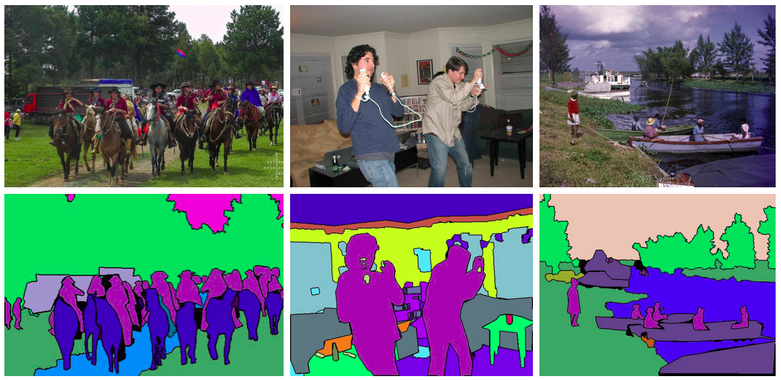

- It has more than 328,000 images with keypoint detection, multi-object detection, captioning, and segmentation mask annotations.
- 80 object categories
- 5 captions per image.

https://cocodataset.org/#home

## Cityscape dataset

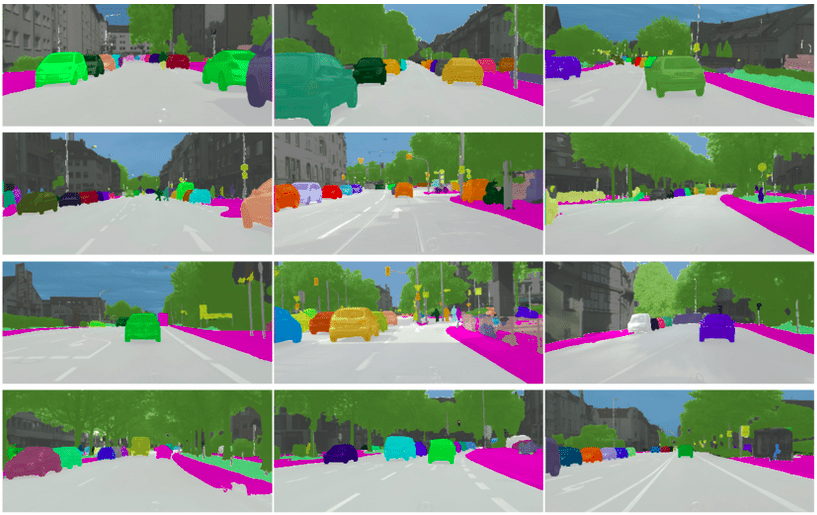

Cityscape is the dataset to go to when looking for various video sequences recorded from several cites’ street scenes. These images were captured over a long time and in different weather and light conditions. The annotations are for
- 30 classes
- 8 different categories.
- 5 000 annotated images with fine annotations
- 20 000 annotated images with coarse annotations

https://www.cityscapes-dataset.com

## CIFAR-10

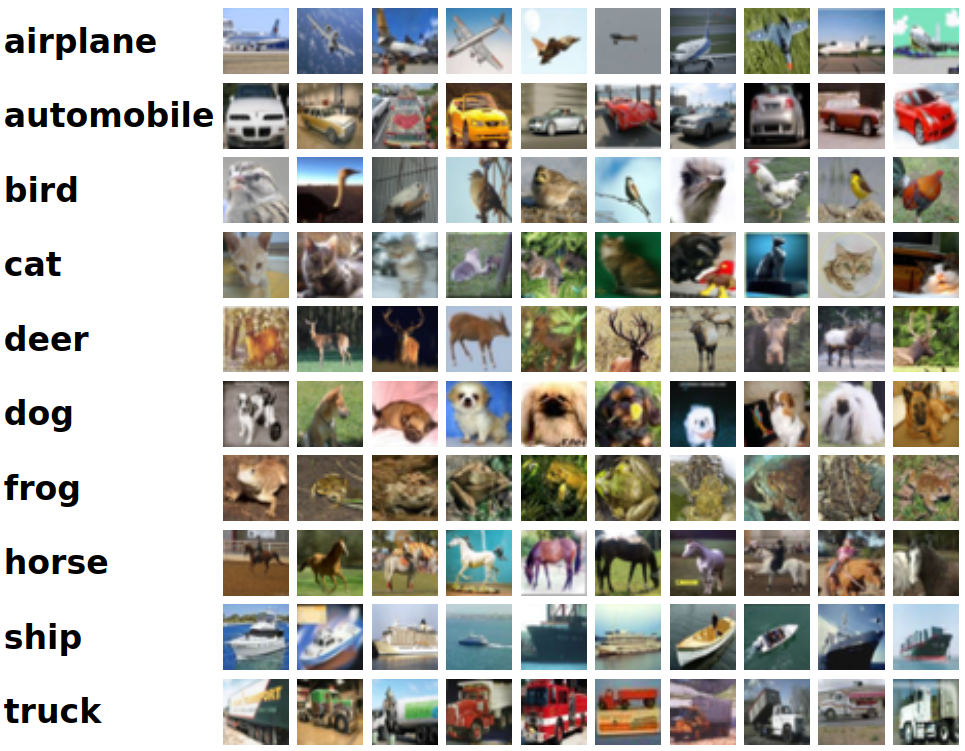

- 60000 colour images with 32x32 resolution
- 10 classes

https://www.cs.toronto.edu/~kriz/cifar.html

## MNIST

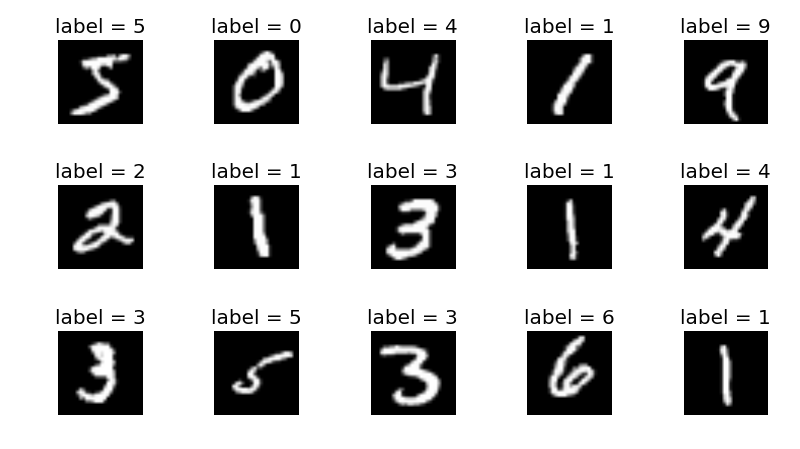

Database of handwritten digits
- training set of 60 000 examples
- test set of 10000 examples